In [1]:
import requests
import re, nltk
import matplotlib.pyplot as plt
import os
import warnings
from nltk.corpus import stopwords
from wordcloud import WordCloud
from bs4 import BeautifulSoup as bs
warnings.filterwarnings('ignore')

In [2]:
#scarping review using beautifulsoup
product_reviews=[]
for i in range(1,30):
    product=[]
    url='https://www.amazon.in/Samsung-Galaxy-Phantom-Storage-Active/product-reviews/B08LRDHLQF/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber='+str(i)
    response = requests.get(url)
    soup = bs(response.content,'html.parser')
    reviews= soup.findAll('span',attrs={'class','a-size-base review-text review-text-content'})
    
    
    for i in range(len(reviews)):
        product.append(reviews[i].text)
    product_reviews=product_reviews + product

with open('product_reviews.txt','w',encoding='utf8') as output:
    output.write(str(product_reviews))

In [3]:
product_reviews

['\n\n  One of the best flagships I have used in my recent purchase... Samsung has done a good job with this S21 series... The display is super amazing, battery life is fabulous... Overall the product offers a quality experience... Although it should include a charging adapter and a back cover...\n\n',
 "\n\n  If you're stuck between choices, hopefully I can help you out.- Priced around 82k(discounted to 76k with a galaxy watch active 2 free in my case)Tldr: comparison between OnePlus 9 pro and this phone, if you're looking for great camera at the cost of just a little snappiness, this is the phone to go for. (Details below)1. [Speed]: A lot us living in India have been accustomed to the ultra fast responsiveness of OnePlus phones, they are optimised for speed, that's their selling point, so OnePlus takes a lead in that dept. Again, in no regard is this a slow phone, just doesn't match snappy standards of OnePlus.(I myself was a OnePlus 6 user before and was considering OnePlus 9 pro)2

In [4]:
#join all review in one paragraph
product_rev_string = " ".join(product_reviews)

# remove unwanted symbols
product_rev_string = re.sub("[^A-Za-z" "]+"," ",product_rev_string).lower()
product_rev_string = re.sub("[0-9" "]+"," ",product_rev_string)   

#split word into saprate string
product_reviews_words = product_rev_string.split(" ")


## WordCloud for all

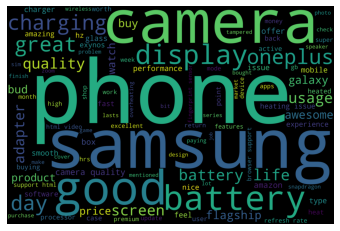

In [6]:
with open("stop.txt","r") as sw:
    stopwords = sw.read()
temp = ["this","is","awsome","Data"]
[i for i in temp if i not in "is"]
product_reviews_words = [w for w in product_reviews_words if not w in stopwords]
product_rev_string = " ".join(product_reviews_words)

#creating word cloud for all words
wordcloud_product = WordCloud(background_color='black',width=3000,height=2000,max_words=100).generate(product_rev_string)
plt.axis('off')
plt.imshow(wordcloud_product)

## Wordcloud for positive word

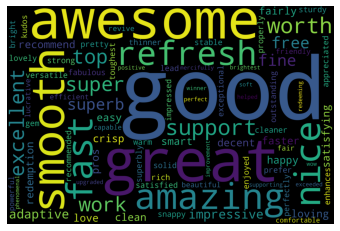

In [8]:
# positive wordcloud
with open("positive-words.txt","r") as pos:
    poswords = pos.read().split("\n")  
    poswords = poswords[36:]

product_pos_in_pos = " ".join ([w for w in product_reviews_words if w in poswords])
wordcloud_pos_in_pos = WordCloud(background_color='black',width=3000,height=2000).generate(product_pos_in_pos)
plt.axis('off')
plt.imshow(wordcloud_pos_in_pos)

#here we get wordcloud of all postive words in reviews

## Wordcloud for all negative word

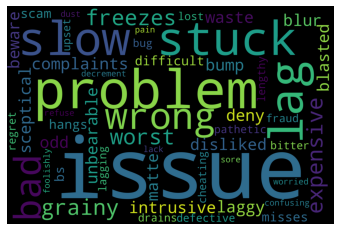

In [10]:
# negative word cloud
with open("negative-words.txt","r",encoding = "ISO-8859-1") as neg:
    negwords = neg.read().split("\n")
    negwords = negwords[37:]

product_neg_in_neg = " ".join ([w for w in product_reviews_words if w in negwords])

wordcloud_neg_in_neg = WordCloud(background_color='black',width=3000,height=2000).generate(product_neg_in_neg)
plt.axis('off')
plt.imshow(wordcloud_neg_in_neg)

#here we are getting the most repeated negative Wordcloud

Thank you!